In [13]:
"""
Created on Wed August 26, 2019

@author: shetu
"""

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D,AveragePooling2D,Conv2D,GaussianNoise
from keras import backend as K
import scipy.io as sio
from scipy.io import wavfile
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.regularizers import l2
from scipy import stats, signal
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt
import matplotlib
import librosa
import tensorflow as tf


## Loading DCT Clean Dataset Matlab file

In [3]:
matstruct_squeezed= sio.loadmat('Final_clean_dataset.mat')
print('Shape of a RIR',np.shape(matstruct_squeezed['new_dataset'][5][3][0]))

Shape of a RIR (21845,)


## Storing the RIRs and Corresponding Sampling Frequency

In [4]:
Data=[]
f_s=[]
for i in range (np.shape(matstruct_squeezed['new_dataset'])[0]):
    to_lp=matstruct_squeezed['new_dataset'][i][3][0]
    sampling_freq= matstruct_squeezed['new_dataset'][i][5]
    f_s.append(sampling_freq)
    Data.append(to_lp)
    

## Storing The Corresponding Subband T60s

In [5]:
target_new=[]
for i in range (np.shape(matstruct_squeezed['new_dataset'])[0]):
    sub_t60=[]
    for e in range(30):
        sub_t60.append(matstruct_squeezed['new_dataset'][i][7][e][0])
    
    
    target_new.append(sub_t60)

## Stroing the Normalized Spectogram of 2s Frame as Input Features and Corresponding Target Features

In [6]:
X=[]
y=[]
count=0
for e in range (np.shape(Data)[0]):
    if np.shape(Data[e])[0]<2*f_s[e][0][0]:
        print('NO Spectro feture in audio:',e)
    else:
        for ii in range(int(np.size(Data[e])/(2*f_s[e][0][0]))):
            raw_rir=Data[e][2*f_s[e][0][0]*ii:(ii+1)*2*f_s[e][0][0]]
            Sxx=np.abs(librosa.stft(raw_rir, n_fft=512))**2
            Sxx=Sxx/np.max(Sxx)
            print('Shape:',np.shape(Sxx),',Audio:',e,',count:',count)
            count+=1
            X.append(Sxx)
            y.append(target_new[e])

    

y = np.array(y)

NO Spectro feture in audio: 0
NO Spectro feture in audio: 1
NO Spectro feture in audio: 2
NO Spectro feture in audio: 3
NO Spectro feture in audio: 4
NO Spectro feture in audio: 5
NO Spectro feture in audio: 6
NO Spectro feture in audio: 7
NO Spectro feture in audio: 8
NO Spectro feture in audio: 9
NO Spectro feture in audio: 10
NO Spectro feture in audio: 11
NO Spectro feture in audio: 12
NO Spectro feture in audio: 13
NO Spectro feture in audio: 14
NO Spectro feture in audio: 15
NO Spectro feture in audio: 16
NO Spectro feture in audio: 17
NO Spectro feture in audio: 18
NO Spectro feture in audio: 19
NO Spectro feture in audio: 20
NO Spectro feture in audio: 21
NO Spectro feture in audio: 22
NO Spectro feture in audio: 23
NO Spectro feture in audio: 24
NO Spectro feture in audio: 25
NO Spectro feture in audio: 26
NO Spectro feture in audio: 27
NO Spectro feture in audio: 28
NO Spectro feture in audio: 29
NO Spectro feture in audio: 30
NO Spectro feture in audio: 31
NO Spectro feture 

Shape: (257, 251) ,Audio: 111 ,count: 176
Shape: (257, 251) ,Audio: 111 ,count: 177
Shape: (257, 251) ,Audio: 111 ,count: 178
Shape: (257, 251) ,Audio: 111 ,count: 179
Shape: (257, 251) ,Audio: 111 ,count: 180
Shape: (257, 251) ,Audio: 111 ,count: 181
Shape: (257, 251) ,Audio: 111 ,count: 182
Shape: (257, 251) ,Audio: 111 ,count: 183
Shape: (257, 251) ,Audio: 112 ,count: 184
Shape: (257, 251) ,Audio: 112 ,count: 185
Shape: (257, 251) ,Audio: 112 ,count: 186
Shape: (257, 251) ,Audio: 112 ,count: 187
Shape: (257, 251) ,Audio: 112 ,count: 188
Shape: (257, 251) ,Audio: 112 ,count: 189
Shape: (257, 251) ,Audio: 112 ,count: 190
Shape: (257, 251) ,Audio: 112 ,count: 191
Shape: (257, 251) ,Audio: 113 ,count: 192
Shape: (257, 251) ,Audio: 113 ,count: 193
Shape: (257, 251) ,Audio: 113 ,count: 194
Shape: (257, 251) ,Audio: 113 ,count: 195
Shape: (257, 251) ,Audio: 113 ,count: 196
Shape: (257, 251) ,Audio: 113 ,count: 197
Shape: (257, 251) ,Audio: 113 ,count: 198
Shape: (257, 251) ,Audio: 113 ,cou

Shape: (257, 251) ,Audio: 136 ,count: 378
Shape: (257, 251) ,Audio: 136 ,count: 379
Shape: (257, 251) ,Audio: 136 ,count: 380
Shape: (257, 251) ,Audio: 136 ,count: 381
Shape: (257, 251) ,Audio: 136 ,count: 382
Shape: (257, 251) ,Audio: 136 ,count: 383
Shape: (257, 251) ,Audio: 137 ,count: 384
Shape: (257, 251) ,Audio: 137 ,count: 385
Shape: (257, 251) ,Audio: 137 ,count: 386
Shape: (257, 251) ,Audio: 137 ,count: 387
Shape: (257, 251) ,Audio: 137 ,count: 388
Shape: (257, 251) ,Audio: 137 ,count: 389
Shape: (257, 251) ,Audio: 137 ,count: 390
Shape: (257, 251) ,Audio: 137 ,count: 391
Shape: (257, 251) ,Audio: 138 ,count: 392
Shape: (257, 251) ,Audio: 138 ,count: 393
Shape: (257, 251) ,Audio: 138 ,count: 394
Shape: (257, 251) ,Audio: 138 ,count: 395
Shape: (257, 251) ,Audio: 138 ,count: 396
Shape: (257, 251) ,Audio: 138 ,count: 397
Shape: (257, 251) ,Audio: 138 ,count: 398
Shape: (257, 251) ,Audio: 138 ,count: 399
Shape: (257, 251) ,Audio: 139 ,count: 400
Shape: (257, 251) ,Audio: 139 ,cou

Shape: (257, 251) ,Audio: 197 ,count: 555
Shape: (257, 251) ,Audio: 197 ,count: 556
Shape: (257, 251) ,Audio: 198 ,count: 557
Shape: (257, 251) ,Audio: 198 ,count: 558
Shape: (257, 251) ,Audio: 198 ,count: 559
Shape: (257, 251) ,Audio: 198 ,count: 560
Shape: (257, 251) ,Audio: 198 ,count: 561
Shape: (257, 251) ,Audio: 199 ,count: 562
Shape: (257, 251) ,Audio: 199 ,count: 563
Shape: (257, 251) ,Audio: 199 ,count: 564
Shape: (257, 251) ,Audio: 199 ,count: 565
Shape: (257, 251) ,Audio: 199 ,count: 566
Shape: (257, 251) ,Audio: 200 ,count: 567
Shape: (257, 251) ,Audio: 200 ,count: 568
Shape: (257, 251) ,Audio: 200 ,count: 569
Shape: (257, 251) ,Audio: 200 ,count: 570
Shape: (257, 251) ,Audio: 200 ,count: 571
Shape: (257, 251) ,Audio: 201 ,count: 572
Shape: (257, 251) ,Audio: 201 ,count: 573
Shape: (257, 251) ,Audio: 201 ,count: 574
Shape: (257, 251) ,Audio: 201 ,count: 575
Shape: (257, 251) ,Audio: 201 ,count: 576
Shape: (257, 251) ,Audio: 202 ,count: 577
Shape: (257, 251) ,Audio: 202 ,cou

Shape: (257, 251) ,Audio: 240 ,count: 767
Shape: (257, 251) ,Audio: 240 ,count: 768
Shape: (257, 251) ,Audio: 240 ,count: 769
Shape: (257, 251) ,Audio: 240 ,count: 770
Shape: (257, 251) ,Audio: 240 ,count: 771
Shape: (257, 251) ,Audio: 241 ,count: 772
Shape: (257, 251) ,Audio: 241 ,count: 773
Shape: (257, 251) ,Audio: 241 ,count: 774
Shape: (257, 251) ,Audio: 241 ,count: 775
Shape: (257, 251) ,Audio: 241 ,count: 776
Shape: (257, 251) ,Audio: 242 ,count: 777
Shape: (257, 251) ,Audio: 242 ,count: 778
Shape: (257, 251) ,Audio: 242 ,count: 779
Shape: (257, 251) ,Audio: 242 ,count: 780
Shape: (257, 251) ,Audio: 242 ,count: 781
Shape: (257, 251) ,Audio: 243 ,count: 782
Shape: (257, 251) ,Audio: 243 ,count: 783
Shape: (257, 251) ,Audio: 243 ,count: 784
Shape: (257, 251) ,Audio: 243 ,count: 785
Shape: (257, 251) ,Audio: 243 ,count: 786
Shape: (257, 251) ,Audio: 244 ,count: 787
Shape: (257, 251) ,Audio: 244 ,count: 788
Shape: (257, 251) ,Audio: 244 ,count: 789
Shape: (257, 251) ,Audio: 244 ,cou

Shape: (257, 251) ,Audio: 284 ,count: 991
Shape: (257, 251) ,Audio: 285 ,count: 992
Shape: (257, 251) ,Audio: 285 ,count: 993
Shape: (257, 251) ,Audio: 285 ,count: 994
Shape: (257, 251) ,Audio: 285 ,count: 995
Shape: (257, 251) ,Audio: 285 ,count: 996
Shape: (257, 251) ,Audio: 286 ,count: 997
Shape: (257, 251) ,Audio: 286 ,count: 998
Shape: (257, 251) ,Audio: 286 ,count: 999
Shape: (257, 251) ,Audio: 286 ,count: 1000
Shape: (257, 251) ,Audio: 286 ,count: 1001
Shape: (257, 251) ,Audio: 287 ,count: 1002
Shape: (257, 251) ,Audio: 287 ,count: 1003
Shape: (257, 251) ,Audio: 287 ,count: 1004
Shape: (257, 251) ,Audio: 287 ,count: 1005
Shape: (257, 251) ,Audio: 287 ,count: 1006
Shape: (257, 251) ,Audio: 288 ,count: 1007
Shape: (257, 251) ,Audio: 288 ,count: 1008
Shape: (257, 251) ,Audio: 288 ,count: 1009
Shape: (257, 251) ,Audio: 288 ,count: 1010
Shape: (257, 251) ,Audio: 288 ,count: 1011
Shape: (257, 251) ,Audio: 289 ,count: 1012
Shape: (257, 251) ,Audio: 289 ,count: 1013
Shape: (257, 251) ,A

## Splitting the Dataset into Training and Testset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 10)

print(np.shape(X_train))
print(np.shape(X_test))

(800, 257, 251)
(343, 257, 251)


##  Reshaping the Data

In [8]:
x_train, y_train = shuffle(X_train, y_train, random_state=6)
x_test, y_test = shuffle(X_test,  y_test, random_state=10)


# input image dimensions
img_rows, img_cols = np.shape(x_train)[1], np.shape(x_train)[2]

if K.image_data_format() == 'channels_first':
    x_train = np.reshape(x_train,(np.shape(x_train)[0], 1, img_rows, img_cols))
    x_test = np.reshape(x_test,(np.shape(x_test)[0], 1, img_rows, img_cols))
    input_shape = (1, img_rows, img_cols)
else:
    x_train = np.reshape(x_train,(np.shape(x_train)[0], img_rows, img_cols,1))
    x_test = np.reshape(x_test,(np.shape(x_test)[0], img_rows, img_cols,1))
    input_shape = (img_rows, img_cols, 1)
    
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_tarin shape',y_train.shape)

x_train shape: (800, 257, 251, 1)
x_test shape: (343, 257, 251, 1)
y_tarin shape (800, 30)


## Creating the Model

In [9]:

model = Sequential()
model.add(GaussianNoise(.1,input_shape=np.shape(x_train[0])))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',padding='same',kernel_initializer=keras.initializers.RandomUniform(minval=-.05, maxval=.05,
                                                                                                      seed=None),
                bias_initializer='zeros',kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005),input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',kernel_initializer=keras.initializers.RandomUniform(minval=-.05, maxval=.05,
                                                                                                      seed=None),
                bias_initializer='zeros',kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005),input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',kernel_initializer=keras.initializers.RandomUniform(minval=-.05, maxval=.05,
                                                                                                      seed=None),
                bias_initializer='zeros',kernel_regularizer=l2(0.0005), bias_regularizer=l2(0.0005),input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Compile and Fitting the Model

In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=100, batch_size=128,  verbose=1, validation_data=(x_test, y_test))



Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 343 samples
Epoch 1/100
800/800 [==============================] - 92s 115ms/step - loss: 0.5122 - mean_absolute_error: 0.5621 - val_loss: 0.4314 - val_mean_absolute_error: 0.4927
Epoch 2/100
800/800 [==============================] - 52s 65ms/step - loss: 0.2396 - mean_absolute_error: 0.3931 - val_loss: 0.4086 - val_mean_absolute_error: 0.4799
Epoch 3/100
800/800 [==============================] - 54s 67ms/step - loss: 0.2128 - mean_absolute_error: 0.3774 - val_loss: 0.3637 - val_mean_absolute_error: 0.4466
Epoch 4/100
800/800 [==============================] - 47s 59ms/step - loss: 0.1966 - mean_absolute_error: 0.3651 - val_loss: 0.3106 - val_mean_absolute_error: 0.4107
Epoch 5/100
800/800 [==============================] - 45s 57ms/step - loss: 0.1754 - mean_absolute_error: 0.3394 - val_loss: 0.2337 - val_mean_absolute_error: 0.3607
Epoch 6/100
800/800 [==============================] - 45s 56ms/step -

Epoch 48/100
800/800 [==============================] - 24s 31ms/step - loss: 0.0407 - mean_absolute_error: 0.1438 - val_loss: 0.0381 - val_mean_absolute_error: 0.1305
Epoch 49/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.1394 - val_loss: 0.0384 - val_mean_absolute_error: 0.1310
Epoch 50/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.1427 - val_loss: 0.0389 - val_mean_absolute_error: 0.1328
Epoch 51/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.1391 - val_loss: 0.0385 - val_mean_absolute_error: 0.1313
Epoch 52/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0365 - mean_absolute_error: 0.1347 - val_loss: 0.0377 - val_mean_absolute_error: 0.1302
Epoch 53/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.1413 - val_loss: 0.0448 - val_mean_absolute_error:

Epoch 97/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0286 - mean_absolute_error: 0.1193 - val_loss: 0.0321 - val_mean_absolute_error: 0.1234
Epoch 98/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.1237 - val_loss: 0.0330 - val_mean_absolute_error: 0.1253
Epoch 99/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0288 - mean_absolute_error: 0.1205 - val_loss: 0.0343 - val_mean_absolute_error: 0.1302
Epoch 100/100
800/800 [==============================] - 25s 31ms/step - loss: 0.0309 - mean_absolute_error: 0.1263 - val_loss: 0.0325 - val_mean_absolute_error: 0.1243


## Plotting the Loss

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


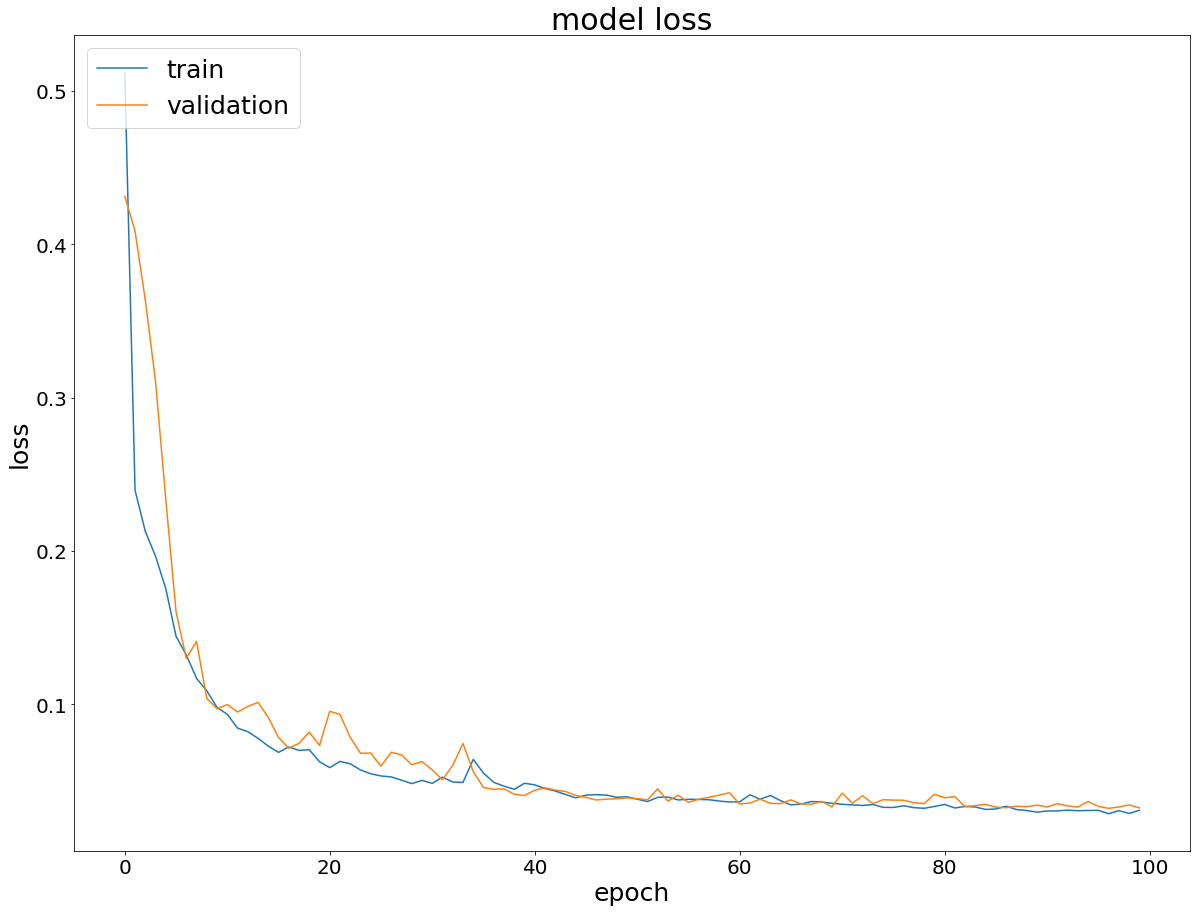

In [22]:
print(history.history.keys())
# "Loss"
plt.figure(figsize=(20,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left',prop={'size': 25})
matplotlib.rcParams.update({'font.size': 25})
plt.savefig('Loss_subband')
plt.show()

## Plot the Predicted result for a RIR

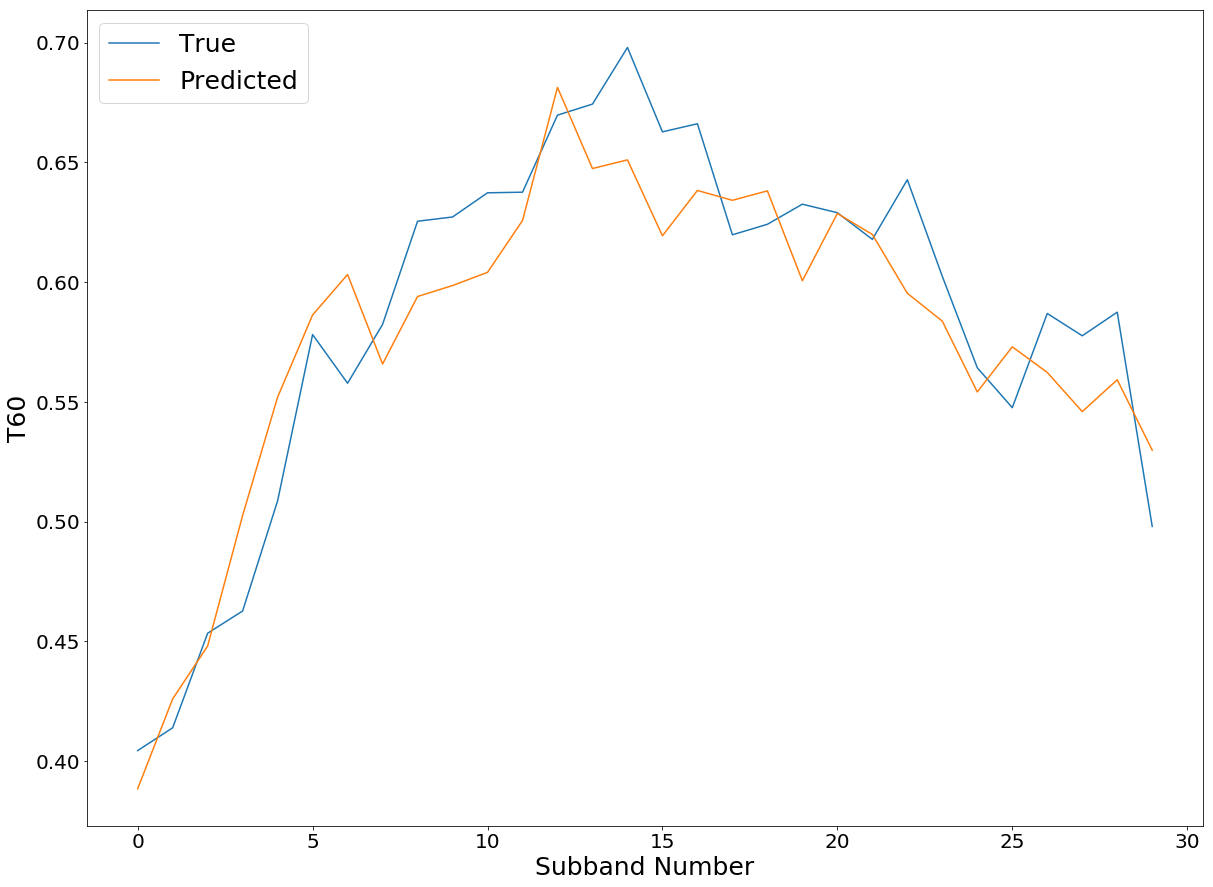

In [25]:
img_num=50

ynew= model.predict(x_test[img_num].reshape(1,x_test[img_num].shape[0],x_test[img_num].shape[1],1))

y_plot=[]
for i in range(30):
    y_plot.append(ynew[0][i])

plt.figure(figsize=(20,15))
plt.plot(y_test[img_num],label='True')
plt.plot(y_plot,label='Predicted')
plt.legend(loc='upper left',prop={'size': 25});

plt.xlabel('Subband Number')
plt.ylabel('T60')
matplotlib.rcParams.update({'font.size': 25})
plt.savefig('DCT_suband1')
# plt.plot(ynew)